<a href="https://www.kaggle.com/code/adsantos/ml-fashion-mnist-classification-part-2?scriptVersionId=111675451" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Classificação de artigos de moda com ML e Fashion MNIST

![](https://github.com/asantos2000/ml-ipt-hw/raw/master/pics/fashion_mnist_dataset_sample.png)

Figure 1. Fashion-MNIST samples (by Zalando, MIT License)

# 1. Problema

> Em 2021, as receitas de comércio eletrônico de varejo das vendas de vestuário e acessórios nos Estados Unidos totalizaram 180,5 bilhões de dólares, aumentando de 144,8 bilhões em 2020. - [Stadist.com](https://www.statista.com/statistics/278890/us-apparel-and-accessories-retail-e-commerce-revenue/)

Um grande problema que este mercado enfrenta é categorizar essas roupas e acessórios apenas pelas imagens, especialmente quando as categorias fornecidas pelas marcas são inconsistentes.

Os clientes não reconhecem as categorias dos produtos que estão buscando e desistem após a primeira pesquisa ou navegação pelas categorias.

Deseja-se identificar, a partir de uma imagem provida pelo usuário, em um dispositivo móvel, a qual categoria aquele item pertence.

## 1.1 Problema de ML

O objetivo é classificar as imagens fornecidas em dez categorias (classificação múltipla) utilizando para treinamento o dataset Fashion MNist e obter uma taxa de acerto acima de 90%.

Os seguintes modelos serão avaliados:

- Aprendizado por transferência: Com os modelos ResNet152 V2, VGG-16, DenseNet169;
- SVM
- ConvNet

Este trabalho está organizado da seguinte forma: 1. Discussão sobre o problema, 2. Planejamento do experimento, 3. Execução do experimento, 4. Análise e interpretação e Apresentação dos resultados.

# 2. Condução do experimento

## 2.1 Pipeline

![](https://github.com/asantos2000/ml-ipt-hw/raw/master/pics/ml-pipeline.png)

## 2.2 Descrição do conjunto de dados

Fashion-MNIST é um conjunto de dados de imagens de artigos de Zalando—consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de teste de 10.000 amostras. Cada amostra é uma imagem em tons de cinza 28x28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como um substituto direto para o conjunto de dados MNIST original para benchmarking de algoritmos de aprendizado de máquina.

Ele compartilha o tamanho exato da imagem e a estrutura das divisões de treinamento e teste. O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade AI/ML/Data Science adoram esse conjunto de dados e o usam como referência para validar seus algoritmos. Na verdade, o MNIST é frequentemente o primeiro conjunto de dados que os pesquisadores tentam.

Cada imagem tem 28 pixels de altura e 28 pixels de largura, para um total de 784 pixels no total.
Cada pixel tem um único valor de pixel associado a ele, indicando a claridade ou escuridão daquele pixel, com números mais altos significando mais escuro. Este valor de pixel é um número inteiro entre 0 e 255.

Os conjuntos de dados de treinamento e teste têm 785 colunas. A primeira coluna é composta pelos rótulos das classes (veja acima), e representa a peça de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são inteiros entre 0 e 27. O pixel está localizado na linha i e coluna j de uma matriz 28 x 28 . Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e na segunda linha da parte superior, como no diagrama ascii abaixo.

## 2.3 Requisitos de software e hardware

### 2.3.1 Requisitos de software

Para executar este notebook no Kaggle basta copiá-lo, em um outro sistema será necessário:

- Python 3.7+
- Jupyter notebook 6.4+ ou jupyterlab 3.2+
    - IPython          : 7.33.0
    - ipykernel        : 6.15.0
    - ipywidgets       : 7.7.1
    - jupyter_client   : 7.3.4
    - jupyter_core     : 4.10.0
    - jupyter_server   : 1.18.0
    - jupyterlab       : 3.2.9
    - nbclient         : 0.5.13
    - nbconvert        : 6.4.5
    - nbformat         : 5.4.0
    - notebook         : 6.4.12
    - qtconsole        : 5.3.1
    - traitlets        : 5.3.0

In [1]:
import os

if os.environ.get('PWD') == '/kaggle/working':
    print("We are running on a Kaggle")
    #! pip install -r ../input/fashionmnistreqs/requirements.txt
    from shutil import copyfile

    # upload python module as a data (file | upload data)
    # copy our file into the working directory (make sure it has .py suffix)
    copyfile(src = "../input/module/mod_util.py", dst = "../working/mod_util.py")

We are running on a Kaggle


In [2]:
# Import important libraries
import time
import wandb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from mod_util import *

In [3]:
# Globais
df_model_metrics = pd.DataFrame()

In [4]:
# Run name
from datetime import datetime
run_name = f"ml-fashion-mnist-class-{datetime.now().strftime('%Y-%m-%d-%H-%M')}"

# Coleta de métrias de hardware
if os.environ.get('PWD') == '/kaggle/working':
    print("We are running on a Kaggle")
    os.environ["WANDB_NOTEBOOK_NAME"] = "/kaggle/working/.ipynb"
    # Provide the WANDB_API_KEY in the prompt below
    extra_dataset_dir = "../input/extra-fashion-test/test_images"
else:
    # Provide the WANDB_API_KEY in the prompt below
    os.environ["WANDB_NOTEBOOK_NAME"] = "ml-fashion-mnist-classification-experiment.ipynb"
    extra_dataset_dir = "input/test_images"

wandb.login()
wandb.init(project="ml-fashion-mnist-class")
wandb.config.epochs = EPOCHS
wandb.config.batch_size = BATCH_SIZE
wandb.run.name = f"ml-fashion-mnist-class{run_name}"

wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find /kaggle/working/.ipynb.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

We are running on a Kaggle


  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: adsantos (ml-ipt). Use `wandb login --relogin` to force relogin


### 2.3.2 Requisitos de hardware
  
No Kaggle as cotas grátis são suficiente, certifique-se de configurar a aceleração para GPU T4 x2. em outro hardware é recomendado pelo menos uma CPU multicore (Ie.Intel i7), 16 GB de RAM e uma acelerado gráfica NVidia GTX 2060 ou equivalente.

Para mais detalhes sobre o hardware utilizado na execução deste experimento, verifique o Apêndice.

## 2.3. Execução do experimento

O experimento irá avaliar na seção 3 os modelos com transferência de conhecimento, na seção 4 variações de treinamento para o medelo SVM e na seção 5 arquitetura ConvNet.

A execução do experimento está dividida em etapas:

- Preparar o conjunto de dados padrão;
- Engenharia de requisitos;
- Selecionar e treinar os modelos;
- Avaliar os modelos;
- Ajustar os modelos.

# 3. Modelos com transferência de conhecimento

A transferência de conhecimento consiste, de forma simplificada, em utilizar um modelo pré-treinado, desabilitar algumas camadas e treiná-lo com um novo conjunto de dados.

## 3.1 Introdução

Com base na avaliação do keras dos [modelo disponíveis](https://keras.io/api/applications/), selecionamos modelos com acurária (Top-5) acima de 90%.

Esses modelos são:

1. [DenseNet169](https://keras.io/api/applications/densenet/#densenet169-function), uma rede convolucionais densamente conectadas [^2]
2. [ResNet152V2](https://keras.io/api/applications/resnet/#resnet152v2-function), uma redes residuais profundas [^3]
3. e a [VGG-16](https://keras.io/api/applications/vgg/#vgg16-function), uma dede convolucional muito profundas para reconhecimento de imagem em grande escala [^4]

De acordo com essa [avaliação](https://keras.io/api/applications/), essas redes tem o seguinte desempenho:

| Modelo      | Tamanho (MB) | Top-1 Acurácia | Top-5 Acurácia | Paâmetros  | Profundidade |
| ---         | ---          | ---            | ---            | ---        | ---          |
| DenseNet169 | 57           | 76.2%          | 93.2%          | 14.3M      | 338          |
| ResNet152V2 | 232          | 78.0%          | 94.2%          | 60.4M      | 307          |
| VGG16       | 528          | 71.3%          | 90.1%          | 138.4M     | 16           |

> A profundidade conta o número de camadas com parâmetros.

O DenseNet-169 foi escolhido porque, apesar de ter uma profundidade de 169 camadas, é relativamente baixo em parâmetros em comparação com outros modelos, e a arquitetura lida bem com o problema do gradiente de fuga.

A escolha da ResNet é por causa da sua arquitetura, ela aprende com as funções residuais em vez de aprender com o sinal diretamente.

A VGG16 é a escolha preferida da comunidade para extrair recursos de imagens. A configuração de peso do VGGNet está disponível publicamente e tem sido usada em muitos outros aplicativos e desafios como um extrator de recursos de linha de base. (SIMONYAN et al., 2014)

### DenseNet169

[Densely Connected Convolutional Networks](https://arxiv.org/abs/1608.06993) (CVPR 2017)

![](https://github.com/asantos2000/ml-ipt-hw/raw/master/pics/DenseNet169-arch-1.png)

![](https://github.com/asantos2000/ml-ipt-hw/raw/master/pics/DenseNet169-arch-2.png)

Podemos ver que a primeira parte da arquitetura DenseNet consiste em uma camada 7x7 stride 2 Conv seguida por uma camada 3x3 stride-2 MaxPooling. E o quarto bloco denso é seguido por uma Camada de Classificação que aceita os mapas de características de todas as camadas da rede para realizar a classificação.

A arquitetura da DenseNet169 é uma coleção de blocos densos.

São 4 blocos com 6, 12, 32, 32 camadas

O DenseNet-169 foi escolhido porque, apesar de ter uma profundidade de 169 camadas, é relativamente baixo em parâmetros em comparação com outros modelos, e a arquitetura lida bem com o problema do gradiente de fuga.

Configuração:
- Ativação: relu (todos)
- Adição de 8 camadas
- Bloco 1: Dropout 40% (prevent overfitting)
- Bloco 2: Dropout 20%
- Bloco 3: Dropout 20%
- Bloco 4: Dropout 20%
- Classificação: Softmax
- Otimização:
	- Otimização: adam
	- Loss: categorical_crossentropy
	- metrics: accuracy

### ResNet152V2

[Identity Mappings in Deep Residual Networks](https://arxiv.org/abs/1603.05027)  (CVPR 2016)

![](https://github.com/asantos2000/ml-ipt-hw/raw/master/pics/ResNet152V2-arch-1.png)

O ResNet pode ter uma rede muito profunda de até 152 camadas aprendendo com as funções  residuais em vez de aprender com o sinal diretamente.

Durante o estágio de treinamento, a rede residual altera os pesos até que a saída seja equivalente à função identidade. No processo, o resultado da função residual eventualmente se torna 0 e X é mapeado nas camadas ocultas.

![](https://github.com/asantos2000/ml-ipt-hw/raw/master/pics/ResNet152V2-arch-2.png)

![](https://github.com/asantos2000/ml-ipt-hw/raw/master/pics/ResNet152V2-arch-3.png)

Configuração:
- Ativação: relu (todos)
- Adição de 8 camadas
- Bloco 1: Dropout 20%
- Bloco 2: Dropout 20%
- Classificação: Softmax
- Otimização:
	- Otimização: adam
	- Loss: categorical_crossentropy
	- metrics: accuracy

#### Referências

- [Review: ResNet — Winner of ILSVRC 2015 (Image Classification, Localization, Detection)](https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8)
- [Detailed Guide to Understand and Implement ResNets](https://cv-tricks.com/keras/understand-implement-resnets/#:~:text=ResNet%20uses%20Batch%20Normalization%20at,network%20from%20vanishing%20gradient%20problem)
- [Why ResNets Are A Major Breakthrough In Image Processing](https://analyticsindiamag.com/why-resnets-are-a-major-breakthrough-in-image-processing/)
- [CNN Architectures: LeNet, AlexNet, VGG, GoogLeNet, ResNet and more…](https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5)

### VGG-16

[Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556) (ICLR 2015)

O VGGNet consiste em 16 camadas convolucionais e é muito atraente por causa de sua arquitetura muito uniforme. Semelhante ao AlexNet, apenas convoluções 3x3, mas muitos filtros. Atualmente, é a escolha preferida da comunidade para extrair recursos de imagens. A configuração de peso do VGGNet está disponível publicamente e tem sido usada em muitos outros aplicativos e desafios como um extrator de recursos de linha de base. No entanto, o VGGNet consiste em 138 milhões de parâmetros, o que pode ser um pouco difícil de lidar.

![](https://github.com/asantos2000/ml-ipt-hw/raw/master/pics/VGG16-arch-1.png)

Como pode ser visto na figura, existem 13 retângulos azuis e 5 vermelhos, ou seja, 13 camadas de convolução e 5 camadas de pool máximo. Junto com eles, existem 3 retângulos verdes representando 3 camadas totalmente conectadas. Portanto, o número total de camadas com parâmetros ajustáveis é 16, das quais 13 são para camadas de convolução e 3 para camadas totalmente conectadas, portanto, o nome é VGG-16. Na saída, temos uma camada softmax com 1000 saídas por categoria de imagem no conjunto de dados imagenet.

![](https://github.com/asantos2000/ml-ipt-hw/raw/master/pics/VGG16-arch-2.png)

Configuração:
- Ativação: relu (todos)
- Adição de 8 camadas
- Bloco 1: Dropout 50%
- Bloco 2: Dropout 40%
- Bloco 2: Dropout 20%
- Classificação: Softmax

#### Referências
- [CNN Architectures: LeNet, AlexNet, VGG, GoogLeNet, ResNet and more…](https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5)
- [An overview of VGG16 and NiN models](https://medium.com/mlearning-ai/an-overview-of-vgg16-and-nin-models-96e4bf398484)
- [The Architecture and Implementation of VGG-16](https://pub.towardsai.net/the-architecture-and-implementation-of-vgg-16-b050e5a5920b)

## 3.2 Preparando o conjunto de dados

Os modelos SVM e ConvNet não necessitam de modificações nos dados, podendo ser treinado com as imagens de tamanho 28x28 e um canal, porém, para transferência de conhecimento é necessário ajustá-las para no mínimo 48x48 com três canais (RGB).

### 3.2.1 Coletando e rotulando os dados

O conjunto de dados Fashion do MNist já está rotulado e faz parte da biblioteca de conjuntos de dados do Keras.

Formato dos conjuntos de dados:

In [5]:
train_X, train_Y, test_X, test_Y = load_mnist_dataset()

train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
test_ext_X, test_ext_Y = load_extra_dataset(extra_dataset_dir)

test_ext_X.shape, test_ext_Y.shape

((336, 28, 28), (336,))

### 3.2.2 Avaliando os dados

In [7]:
dataset_size = train_X.shape[0]+test_X.shape[0]
train_size = train_X.shape[0]
test_size = test_X.shape[0]
extra_test_size = test_ext_X.shape[0]

print(f"Train with {train_size:,} images that represents {round(train_size / dataset_size*100,2)}% of dataset size of {dataset_size:,}.")
print(f"Test with {test_size:,} images that represents {round(test_size / dataset_size*100,2)}% of dataset size of {dataset_size:,}.")
print(f"Test with extra {extra_test_size:,} images that represents {round(extra_test_size / dataset_size*100,2)}% of dataset size of {dataset_size:,}.")

Train with 60,000 images that represents 85.71% of dataset size of 70,000.
Test with 10,000 images that represents 14.29% of dataset size of 70,000.
Test with extra 336 images that represents 0.48% of dataset size of 70,000.


Distribuição dos conjuntos de dados:

In [8]:
train_data = pd.DataFrame(np.asarray(np.c_[train_Y, train_X.reshape(train_X.shape[0], 784)]))
test_data = pd.DataFrame(np.asarray(np.c_[test_Y, test_X.reshape(test_X.shape[0], 784)]))
test_ext_data = pd.DataFrame(np.asarray(np.c_[test_ext_Y, test_ext_X.reshape(test_ext_X.shape[0], 784)]))

print("--- Train data ---")
get_classes_distribution(train_data)
print("--- Test data ---")
get_classes_distribution(test_data)
print("--- Test with extra data ---")
get_classes_distribution(test_ext_data)

--- Train data ---
Bota                :   6000 or 10.0%
Camiseta            :   6000 or 10.0%
Vestido             :   6000 or 10.0%
Pulôver             :   6000 or 10.0%
Tênis               :   6000 or 10.0%
Sandália            :   6000 or 10.0%
Calça               :   6000 or 10.0%
Camisa              :   6000 or 10.0%
Casaco              :   6000 or 10.0%
Bolsa               :   6000 or 10.0%
--- Test data ---
Bota                :   1000 or 10.0%
Pulôver             :   1000 or 10.0%
Calça               :   1000 or 10.0%
Camisa              :   1000 or 10.0%
Casaco              :   1000 or 10.0%
Sandália            :   1000 or 10.0%
Tênis               :   1000 or 10.0%
Vestido             :   1000 or 10.0%
Bolsa               :   1000 or 10.0%
Camiseta            :   1000 or 10.0%
--- Test with extra data ---
Camiseta            :   59 or 17.6%
Tênis               :   56 or 16.7%
Bota                :   52 or 15.5%
Bolsa               :   44 or 13.1%
Sandália            :   36 or 

## 3.3 Engenharia de características 

Para o treinamento do modelo SVM foi aplicada a redução do número de caracteristicas utilizando HOG, já para os modelos pré treinados foi necessário aumentar esse conjunto, como demonstrado nas seções seguintes.

### 3.3.1 Preprocessar os dados

Para aplicar a transferência de conhecimento (_transfer learning_) para os modelos selecionado, é necessário:

- Converter as imagens em 3 canais para ajustá-las a entrada dos modelos;
- Redefinir o formato para o formato do _tensor_ (requerido pelo tensorflow);
- Redimensionar as imagens para 48x48.


In [9]:
train_X = adjust_data_for_transfer_learning(train_X, 48)
test_X = adjust_data_for_transfer_learning(test_X, 48)
test_ext_X = adjust_data_for_transfer_learning(test_ext_X, 48)
print(f"train_X: {train_X.shape}")
print(f"test_X: {test_X.shape}")
print(f"test_ext_X: {test_ext_X.shape}")

train_X: (60000, 48, 48, 3)
test_X: (10000, 48, 48, 3)
test_ext_X: (336, 48, 48, 3)


Formato e exemplo de uma figura no conjunto de dados.

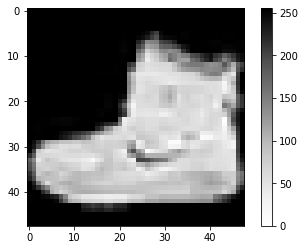

In [10]:
exibe_bitmap_primeira_imagem(train_X)

### 3.3.2 Normalizar os dados

Os dados devem ser pré-processados antes de treinar a rede. Ao inspecionar a primeira imagem no conjunto de treinamento, verá que os valores de pixel ficam no intervalo de 0 a 255.

Escalamos esses valores para um intervalo de 0 a 1 antes de alimentá-los ao modelo de rede neural. Para isso, dividimos os valores por 255. É importante que o conjunto de treinamento e o conjunto de teste sejam pré-processados da mesma forma.

In [11]:
# Normalize the data and change data type
train_X = train_X / 255.
test_X = test_X / 255.
test_ext_X = test_ext_X / 255.

Conjunto de dados normalizado:

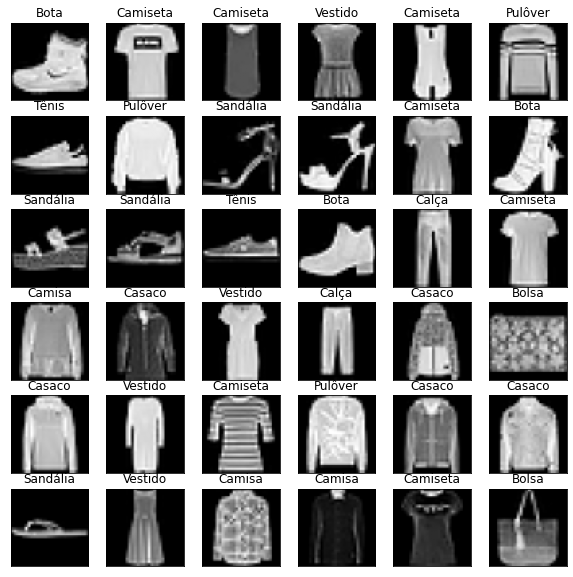

In [12]:
exibe_grade_imagens(AMOSTRAS_GRID, train_X, train_Y, must_reshape=False)

Conjunto extra de dados normalizado.

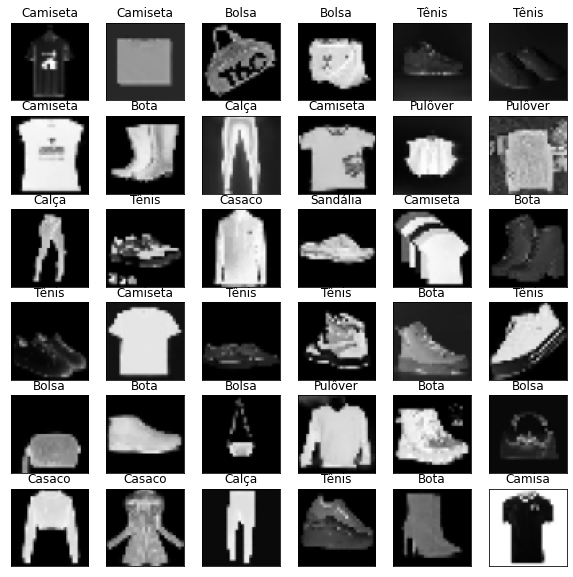

In [13]:
exibe_grade_imagens(AMOSTRAS_GRID, test_ext_X, test_ext_Y, must_reshape=False)

### 3.3.3 Converter rótulos em codificador one-hot (para categórico)

Para variáveis categóricas em que não existe relacionamento ordinal, a codificação inteira pode não ser suficiente, na melhor das hipóteses, ou enganosa para o modelo, na pior.

Forçar uma relação ordinal por meio de uma codificação ordinal e permitir que o modelo assuma uma ordenação natural entre categorias pode resultar em desempenho ruim ou resultados inesperados.

Nesse caso, uma codificação _one-hot_ pode ser aplicada à representação ordinal. É aqui que a variável codificada de inteiro é removida e uma nova variável binária é adicionada para cada valor inteiro exclusivo na variável.

> Cada bit representa uma categoria possível. Se a variável não pode pertencer a várias categorias ao mesmo tempo, apenas um bit no grupo pode estar “ligado”. Isso é chamado de codificação one-hot.

In [14]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
test_ext_Y_one_hot = to_categorical(test_ext_Y) 

In [15]:
print("Examples:")
print(f"Category: {train_Y[0]}, Dummy vars: {train_Y_one_hot[0]}")
print(f"Category: {train_Y[1]}, Dummy vars: {train_Y_one_hot[1]}")

Examples:
Category: 9, Dummy vars: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Category: 0, Dummy vars: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 3.3.4 Dividindo os dados de treinamento em treinamento e validação

In [16]:
train_X, valid_X, train_label, valid_label = train_test_split(train_X,
                                                              train_Y_one_hot,
                                                              test_size=0.2,
                                                              random_state=42)

## 3.4 Treinar modelo

Hiperparametros

In [17]:
image_size = train_X[0].shape[0]
channels = 3
print("imageSize: ", image_size)

imageSize:  48


### 3.4.1 DenseNet169

In [18]:
# Config model name for the experiment
wandb.config.architecture = "DenseNet169"

model_DenseNet169 = adj_model_DenseNet169(image_size, channels)

# Train
start = time.perf_counter()
history_DenseNet169_model = model_DenseNet169.fit(train_X, 
                                                train_label, 
                                                validation_data = (valid_X,
                                                                   valid_label), 
                                                epochs = EPOCHS, 
                                                batch_size = BATCH_SIZE, 
                                                verbose = 1)
end = time.perf_counter()
train_duration_DenseNet169 = end - start

2022-11-24 03:33:12.762702: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 03:33:12.875512: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 03:33:12.876620: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 03:33:12.878977: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Number of layer DenseNet169: 595


2022-11-24 03:33:20.745057: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1327104000 exceeds 10% of free system memory.
2022-11-24 03:33:22.504928: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1327104000 exceeds 10% of free system memory.
2022-11-24 03:33:23.791910: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-11-24 03:33:41.554210: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


69/69 [==============================] - 44s 243ms/step - loss: 0.8338 - accuracy: 0.6938 - val_loss: 2.6044 - val_accuracy: 0.1002
Epoch 2/30
69/69 [==============================] - 11s 154ms/step - loss: 0.5054 - accuracy: 0.8153 - val_loss: 3.2331 - val_accuracy: 0.1002
Epoch 3/30
69/69 [==============================] - 12s 168ms/step - loss: 0.4475 - accuracy: 0.8370 - val_loss: 3.4400 - val_accuracy: 0.2037
Epoch 4/30
69/69 [==============================] - 12s 168ms/step - loss: 0.4016 - accuracy: 0.8569 - val_loss: 4.3905 - val_accuracy: 0.1163
Epoch 5/30
69/69 [==============================] - 11s 154ms/step - loss: 0.3643 - accuracy: 0.8688 - val_loss: 4.1310 - val_accuracy: 0.1279
Epoch 6/30
69/69 [==============================] - 12s 168ms/step - loss: 0.3466 - accuracy: 0.8754 - val_loss: 2.8530 - val_accuracy: 0.2297
Epoch 7/30
69/69 [==============================] - 11s 153ms/step - loss: 0.3353 - accuracy: 0.8802 - val_loss: 4.5387 - val_accuracy: 0.1023
Epoch 8/30

Visualizando o modelo:

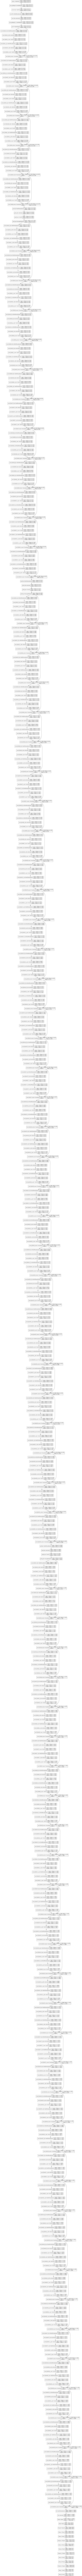

In [19]:
plot_model(model_DenseNet169, 
           to_file = "plot-densenet169.png", 
           show_shapes = True, 
           show_layer_names = True)

### 3.4.2 ResNet152V2

In [20]:
# Config model name for the experiment
wandb.config.architecture = "ResNet152V2"

model_ResNet152V2 = adj_model_ResNet152V2(image_size, channels)

# Train
start = time.perf_counter()
history_ResNet152V2_model = model_ResNet152V2.fit(train_X, 
                                                train_label, 
                                                validation_data = (valid_X,
                                                                   valid_label), 
                                                epochs = EPOCHS, 
                                                batch_size = BATCH_SIZE, 
                                                verbose = 1)
end = time.perf_counter()
train_duration_ResNet152V2 = end - start

234561536/234545216 [==============================] - 10s 0us/step
Number of layer ResNet152V2: 564


2022-11-24 03:40:21.751101: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1327104000 exceeds 10% of free system memory.
2022-11-24 03:40:23.289616: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1327104000 exceeds 10% of free system memory.


Epoch 1/30
69/69 [==============================] - 36s 360ms/step - loss: 0.8899 - accuracy: 0.6994 - val_loss: 3.4966 - val_accuracy: 0.7754
Epoch 2/30
69/69 [==============================] - 20s 290ms/step - loss: 0.3050 - accuracy: 0.8981 - val_loss: 0.4107 - val_accuracy: 0.8928
Epoch 3/30
69/69 [==============================] - 20s 290ms/step - loss: 0.2357 - accuracy: 0.9186 - val_loss: 0.3669 - val_accuracy: 0.8909
Epoch 4/30
69/69 [==============================] - 22s 319ms/step - loss: 0.1965 - accuracy: 0.9321 - val_loss: 0.3074 - val_accuracy: 0.9033
Epoch 5/30
69/69 [==============================] - 20s 289ms/step - loss: 0.1586 - accuracy: 0.9450 - val_loss: 0.3272 - val_accuracy: 0.9118
Epoch 6/30
69/69 [==============================] - 22s 320ms/step - loss: 0.1378 - accuracy: 0.9537 - val_loss: 0.3454 - val_accuracy: 0.9122
Epoch 7/30
69/69 [==============================] - 20s 289ms/step - loss: 0.1152 - accuracy: 0.9601 - val_loss: 0.3586 - val_accuracy: 0.9117

In [21]:
plot_model(model_ResNet152V2,
           to_file = "plot-resnet152v2.png", 
           show_shapes = True, 
           show_layer_names = True)

### 3.4.3 VGG-16

In [22]:
# Config model name for the experiment
wandb.config.architecture = "VGG16"

model_VGG16 = adj_model_VGG16(image_size, channels)

# Train
start = time.perf_counter()
history_VGG16_model = model_VGG16.fit(train_X, 
                                      train_label, 
                                      validation_data = (valid_X,
                                                         valid_label), 
                                      epochs = EPOCHS,
                                      batch_size = BATCH_SIZE, 
                                      verbose = 1)
end = time.perf_counter()
train_duration_VGG16 = end - start

Number of layer VGG16: 19


2022-11-24 03:50:56.050736: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1327104000 exceeds 10% of free system memory.


Epoch 1/30
69/69 [==============================] - 16s 172ms/step - loss: 2.3023 - accuracy: 0.1050 - val_loss: 2.3014 - val_accuracy: 0.1002
Epoch 2/30
69/69 [==============================] - 8s 119ms/step - loss: 2.3004 - accuracy: 0.1293 - val_loss: 2.2979 - val_accuracy: 0.1002
Epoch 3/30
69/69 [==============================] - 8s 118ms/step - loss: 2.2939 - accuracy: 0.1486 - val_loss: 2.2829 - val_accuracy: 0.1432
Epoch 4/30
69/69 [==============================] - 8s 119ms/step - loss: 2.2549 - accuracy: 0.1837 - val_loss: 2.1814 - val_accuracy: 0.2138
Epoch 5/30
69/69 [==============================] - 8s 119ms/step - loss: 2.0193 - accuracy: 0.1945 - val_loss: 1.7873 - val_accuracy: 0.2059
Epoch 6/30
69/69 [==============================] - 8s 119ms/step - loss: 1.8157 - accuracy: 0.2100 - val_loss: 1.6727 - val_accuracy: 0.3368
Epoch 7/30
69/69 [==============================] - 8s 119ms/step - loss: 1.7436 - accuracy: 0.2459 - val_loss: 1.6059 - val_accuracy: 0.3231
Epoch

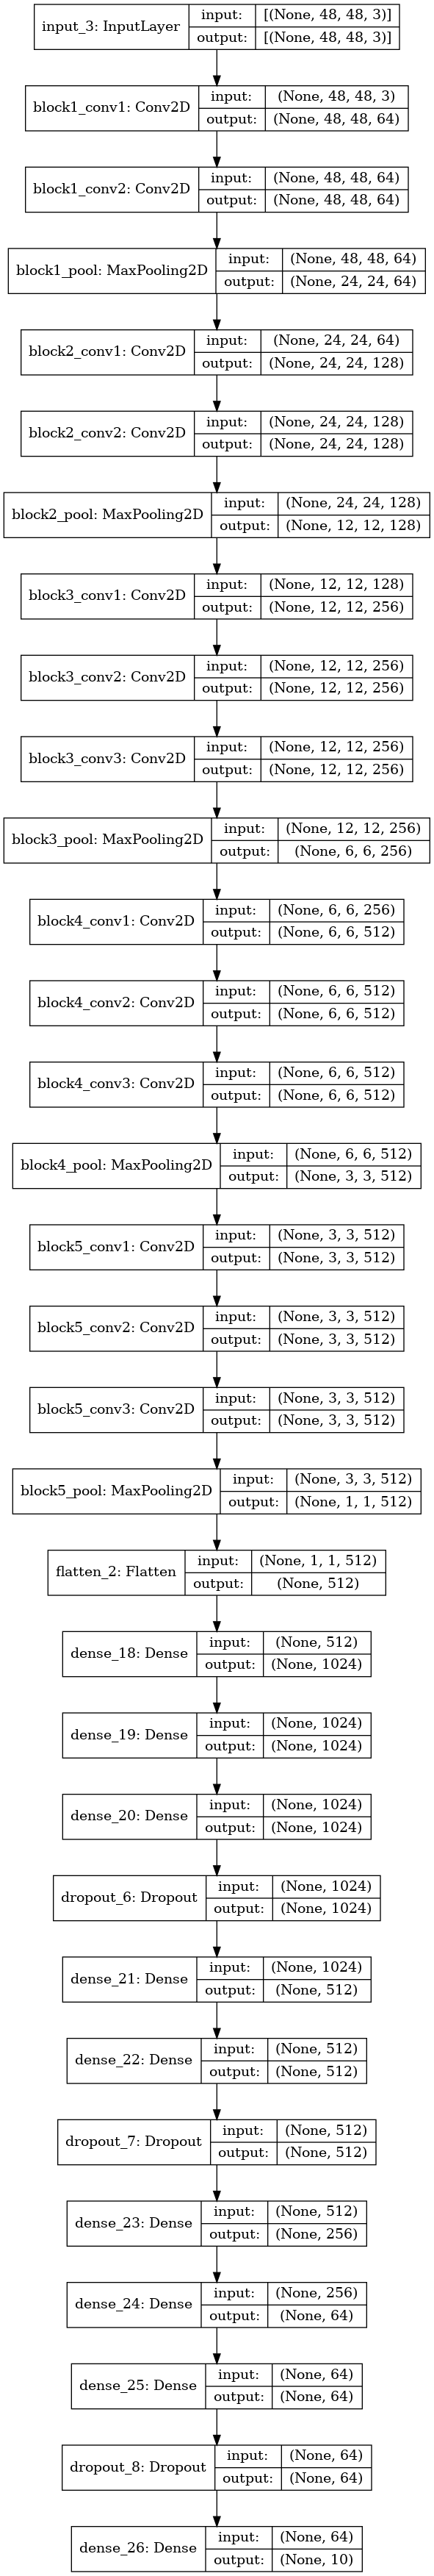

In [23]:
plot_model(model_VGG16,
           to_file = "plot-vgg16.png",
           show_shapes = True,
           show_layer_names = True)

## 3.5 Avaliar os modelos

A métrica de avaliação para os modelos será a precisão multiclasse.

### 3.5.1 Visualizando a acurácia e as perdas 

##### DenseNet169

In [24]:
plot_acc_loss(history_DenseNet169_model, "DenseNet169", EPOCHS);

- Accuracy and loss for DenseNet169 model with 30 epochs


##### ResNet152V2

In [25]:
plot_acc_loss(history_ResNet152V2_model, "ResNet152V2", EPOCHS);

- Accuracy and loss for ResNet152V2 model with 30 epochs


##### VGG16

In [28]:
plot_acc_loss(history_VGG16_model, "VGG16", EPOCHS);

- Accuracy and loss for VGG16 model with 30 epochs


### 3.5.2 Testando os modelos

#### DenseNet169

In [ ]:
print("Avaliando DenseNet169")
print(model_DenseNet169.metrics_names)
me = model_DenseNet169.evaluate(test_X, test_Y_one_hot)
print(me)

Avaliando DenseNet169
['loss', 'accuracy']
  1/313 [..............................] - ETA: 2:30 - loss: 0.6032 - accuracy: 0.8438

In [ ]:
print("Avaliando DenseNet169")
print(model_DenseNet169.metrics_names)
me =model_DenseNet169.evaluate(test_ext_X, test_ext_Y_one_hot)
print(me)

 #### ResNet152V2

In [ ]:
print("Avaliando ResNet152V2")
print(model_ResNet152V2.metrics_names)
me = model_ResNet152V2.evaluate(test_X, test_Y_one_hot)
print(me)

In [ ]:
print("Avaliando ResNet152V2")
print(model_ResNet152V2.metrics_names)
me = model_ResNet152V2.evaluate(test_ext_X, test_ext_Y_one_hot)
print(me)

#### VGG16

In [ ]:
print("Avaliando VGG-16")
print(model_VGG16.metrics_names)
me = model_VGG16.evaluate(test_X, test_Y_one_hot)
print(me)

In [ ]:
print("Avaliando VGG-16")
print(model_VGG16.metrics_names)
me = model_VGG16.evaluate(test_ext_X, test_ext_Y_one_hot)
print(me)

### 3.5.3 Predições com os modelos

Avaliação das previsões em relação ao _Ground Truth_.

In [ ]:
# predict DenseNet169 Model
start = time.perf_counter()
pred_Y_DenseNet169 = model_DenseNet169.predict(test_X)
end = time.perf_counter()

show_predict(pred_Y_DenseNet169, test_X, test_Y, "DenseNet169")

predict_duration_DenseNet169 =  end - start

In [ ]:
# predict ResNet152V2 Model
start = time.perf_counter()
pred_Y_ResNet152V2 = model_ResNet152V2.predict(test_X)
end = time.perf_counter()

show_predict(pred_Y_ResNet152V2, test_X, test_Y, "ResNet152V2")

predict_duration_ResNet152V2 = predict_duration_DenseNet169

In [ ]:
# predict VGG16 Model
start = time.perf_counter()
pred_Y_VGG16 = model_VGG16.predict(test_X)
end = time.perf_counter()

show_predict(pred_Y_VGG16, test_X, test_Y, "VGG16")

predict_duration_VGG16 = end - start

Predição com conjunto extra de dados

In [ ]:
#predict DenseNet169 Model
pred_ext_Y_DenseNet169 = model_DenseNet169.predict(test_ext_X)
show_predict(pred_Y_DenseNet169, test_ext_X, test_ext_Y, "DenseNet169")

In [ ]:
#predict ResNet152V2 Model
pred_ext_Y_ResNet152V2 = model_ResNet152V2.predict(test_ext_X)
show_predict(pred_Y_ResNet152V2, test_ext_X, test_ext_Y, "ResNet152V2")

In [ ]:
#predict VGG16 Model
pred_ext_Y_VGG16 = model_VGG16.predict(test_ext_X)
show_predict(pred_Y_VGG16, test_ext_X, test_ext_Y, "VGG16")

### 3.5.4 Matriz de confusão para verificar a precisão

In [ ]:
# confusion matrix for DenseNet169 Model
show_confusion_matrix(test_Y, pred_Y_DenseNet169)

In [ ]:
# confusion matrix for ResNet152V2 Model
show_confusion_matrix(test_Y, pred_Y_ResNet152V2)

In [ ]:
# confusion matrix for VGG16 Model
show_confusion_matrix(test_Y, pred_Y_VGG16)

Matriz de confusão com conjunto extra de dados.

In [ ]:
# confusion matrix for DenseNet169 Model
show_confusion_matrix(test_ext_Y, pred_ext_Y_DenseNet169)

In [ ]:
# confusion matrix for ResNet152V2 Model
show_confusion_matrix(test_ext_Y, pred_ext_Y_ResNet152V2)

In [ ]:
# confusion matrix for VGG16 Model
show_confusion_matrix(test_ext_Y, pred_ext_Y_VGG16)

### 3.5.5 Relatório de classificação

In [ ]:
# Classification Report for DenseNet169 Model
cr = show_classification_report(test_Y, pred_Y_DenseNet169, CLASS_NAMES, "DenseNet169")

# Prepare report
df_model_metrics = df_model_metrics.append(add_model_metrics(cr, train_duration_DenseNet169, predict_duration_DenseNet169, "DenseNet169", 0))

In [ ]:
# Classification Report for ResNet152V2 Model
cr = show_classification_report(test_Y, pred_Y_ResNet152V2, CLASS_NAMES, "ResNet152V2")

# Prepare report
df_model_metrics = df_model_metrics.append(add_model_metrics(cr, train_duration_ResNet152V2, predict_duration_ResNet152V2, "ResNet152V2", 1))

In [ ]:
# Classification Report for DenseNet169 Model
cr = show_classification_report(test_Y, pred_Y_VGG16, CLASS_NAMES, "VGG16")

# Prepare report
df_model_metrics = df_model_metrics.append(add_model_metrics(cr, train_duration_VGG16, predict_duration_VGG16, "VGG16", 2))

Relatório de classificação com conjunto extra de dados.

In [ ]:
# Classification Report for DenseNet169 Model
cr = show_classification_report(test_ext_Y, pred_ext_Y_DenseNet169, CLASS_NAMES, "DenseNet169")

In [ ]:
# Classification Report for ResNet152V2 Model
cr = show_classification_report(test_ext_Y, pred_ext_Y_ResNet152V2, CLASS_NAMES, "ResNet152V2")

In [ ]:
# Classification Report for DenseNet169 Model
cr = show_classification_report(test_ext_Y, pred_ext_Y_VGG16, CLASS_NAMES, "VGG16")

# 4. Modelo SVM

Classificação de imagem utilizando SVM.

O conjunto de dados não precisa ser redimensionado e canais de cor adicionados como nos modelos CNN.

In [ ]:
x_train, y_train, x_test, y_test = load_mnist_dataset()

In [ ]:
plota_barras_treinamento_e_teste(y_train, y_test)

As distribuições são iguais entre todas as características nesta base de dados

## 4.1 Preparação modelo SVM-HOG

Utiliza o HOG (Histogram of Oriented Gradient) para reduzir as características das imagens. É verdade que a base de imagens já está reduzida. Ainda assim, vamos aplicar esse método padronizado para avaliar o seu impacto no resultado final.

#### Grade com amostra das imagens originais em escala de cinza

In [ ]:
exibe_grade_imagens(AMOSTRAS_GRID, x_train, y_train)

#### Amostras HOG

In [ ]:
feat_hog, img_hog = gera_amostras_hog(AMOSTRAS_GRID, x_train)
exibe_grade_imagens(AMOSTRAS_GRID, img_hog, y_train, must_reshape=False)

É perceptível pelas características acima que a transformação HOG mantém poucos elementos da imagem. As imagens também ficam muito parecidas. A redução de pixels é significativa:

### 4.1.2 Comparação de características (features) entre original e HOG

In [ ]:
comparativo_imagem_hog(x_train[0], img_hog[0])

### 4.1.3 Treinamento

Treina um modelo classificador gradiente descent utilizando SVM, utilizando as características reduzidas HOG

In [ ]:
# Config model name for the experiment
wandb.config.architecture = "SVM-HOG"

start = time.perf_counter()
model = treina_com_hog(x_train, y_train)
end = time.perf_counter()

train_duration_SVM_HOG = end - start

#### Base de Testes

Faz as transformações na base de testes e então aplica as predições e analisa o percentual de acertos

In [ ]:
start = time.perf_counter()
predicoes_com_hog = model.predict(x_test)
end = time.perf_counter()
predict_duration_SVM_HOG = end - start

exibe_percentual_de_acerto(predicoes_com_hog, y_test)

### 4.1.4 Avaliação

#### Matriz de confusão

Monta matriz de confusão para analisar o resultado na base de testes

In [ ]:
plot_confusion_matrix(y_test, predicoes_com_hog)

#### Relatório de classificação

In [ ]:
# Classification Report for DenseNet169 Model
cr = show_classification_report_svm(y_test, predicoes_com_hog, CLASS_NAMES, "SVM-HOG")

# Prepare report
df_model_metrics = df_model_metrics.append(add_model_metrics(cr, train_duration_SVM_HOG, predict_duration_SVM_HOG, "SVM-HOG", 3))

## 4.2 SVM otimizado

O percentual de acerto de 71% é ruim. Pra buscar melhorar a performance aplicamos cross-validation utilizando grid-search pra buscar a melhor combinação de parâmetros

In [ ]:
# Config model name for the experiment
wandb.config.architecture = "SVM-HOG-OPT"

start = time.perf_counter()
modelo_otimizado = treina_com_hog_otimizado(x_train, y_train)
end = time.perf_counter()
# Fitting 3 folds for each of 14 candidates, totalling 42 fits
train_duration_SVM_HOG_OPT = (end - start) / 42

#salva_modelo(modelo_otimizado, "modelo_otimizado")

Lista o conjunto de parâmetros no pipeline que tiveram a melhor performance. Depois apresenta o maior percentual de acerto

In [ ]:
exibe_otimizacao(modelo_otimizado)

In [ ]:
start = time.perf_counter()
predicoes_otimizado = modelo_otimizado.predict(x_test)
end = time.perf_counter()
predict_duration_SVM_HOG_OPT = end - start

exibe_percentual_de_acerto(predicoes_otimizado, y_test)

### 4.2.1 Avaliação do modelo

#### Matriz de confusão

In [ ]:
plot_confusion_matrix(y_test, predicoes_otimizado)

In [ ]:
# Classification Report for DenseNet169 Model
cr = show_classification_report_svm(y_test, predicoes_otimizado, CLASS_NAMES, "SVM-HOG-OPT")

# Prepare report
df_model_metrics = df_model_metrics.append(add_model_metrics(cr, train_duration_SVM_HOG_OPT, predict_duration_SVM_HOG_OPT, "SVM-HOG-OPT", 4))

## 4.3 SVM - Sem redução de parâmetros (HOG)

In [ ]:
start = time.perf_counter()
modelo_sem_hog = treina_sem_hog(x_train, y_train)
end = time.perf_counter()
train_duration_SVM = end - start

start = time.perf_counter()
predicoes_sem_hog = modelo_sem_hog.predict(x_test)
end = time.perf_counter()

predict_duration_SVM = end - start

exibe_percentual_de_acerto(predicoes_sem_hog, y_test)

### 4.3.1 Avaliando o modelo

#### Matriz de confusão

In [ ]:
plot_confusion_matrix(y_test, predicoes_sem_hog)

#### Relatório de classificação

In [ ]:
# Classification Report for DenseNet169 Model
cr = show_classification_report_svm(y_test, predicoes_sem_hog, CLASS_NAMES, "SVM")

# Prepare report
df_model_metrics = df_model_metrics.append(add_model_metrics(cr, train_duration_SVM, predict_duration_SVM, "SVM", 5))

Neste cenário o percentual foi melhor do que o cenário não otimizado com redução porém um pouco pior que o otimizado. Contudo as confusões com Camisa foram significativamente menores mas as confusões com Pulôver foram bem mais significativas

O que percebemos é que a otimização piorou o resultado

## 4.4 Predição

O modelo de melhor desempenho foi o modelo otimizado, vamos realizar uma validação de comapo com o conjunto de dados de autoria própria, com imagens obtidas em pesquisas na internet, redimensionadas e rotuladas para testes.

In [ ]:
test_ext_X, test_ext_Y = load_extra_dataset(extra_dataset_dir)

In [ ]:
exibe_grade_imagens(AMOSTRAS_GRID, test_ext_X, test_ext_Y)

Predição com modelo de melhor desempenho.

In [ ]:
predicoes_otimizado = modelo_otimizado.predict(test_ext_X)

plot_confusion_matrix(test_ext_Y, predicoes_otimizado)

Da mesma forma que os modelos CNN, o SVN não obteve um bom resultado com o conjunto de dados de teste de campo. Embora as imagens tenham as mesmas características (28 x 28 pixels, 1 canal), a hipótese é que por serem imagens originalmente coloridas e com resolução mais alta, ao serem redimensionadas e alteradas para tons de cinza (1 canal), algumas características se tornaram indistinguiveis, outra explicação é que algumas imagnes as peças aparecem em angulos diferentes, por vezes duas peças na mesma imagem (pares de tenis).

# 5. Modelo ConvNet

O conjunto de dados é o mesmo utilizado pelo SVM, 28 x  28 pixels, 1 canal.

In [ ]:
trainX, trainy, testX, testy, testy_no_cat = load_dataset_convnet()

Os dados de treinamento extra são os obtidos em pesquisas no google e utilizado nos outros modelos como teste de campo.

In [ ]:
test_ext_X, test_ext_Y = load_extra_dataset(extra_dataset_dir)
test_ext_X = test_ext_X.reshape((test_ext_X.shape[0], 28, 28, 1))
test_ext_Y_cat = to_categorical(test_ext_Y)

Os valores dos pixels são normalizados para a faixa entre 0 e 1.

In [ ]:
# Normalize the data and change data type
trainX = trainX / 255.
testX = testX / 255.
test_ext_X = test_ext_X / 255.

## 5.1 Treinamento

Testando o modelo com diferentes combinações do conjunto de dados.

In [ ]:
run_test_harness(trainX, trainy, testX, to_categorical(testy))


Todos os modelos alcançaram um resultado acima de 90%. Para efeito de tomada de tempo, vamos treinar um modelo novamente.

In [ ]:
start = time.perf_counter()
m = run_fit_model(trainX, trainy, testX, testy)
end = time.perf_counter()
train_duration = end - start

In [ ]:
plot_model(m,
           to_file = "plot-convnet.png",
           show_shapes = True,
           show_layer_names = True)

## 5.2 Avaliação

In [ ]:
start = time.perf_counter()
predicoes = show_confusion_matrix_convnet(testX, testy, m)
end = time.perf_counter()

predict_duration = end - start

In [ ]:
# Classification Report for DenseNet169 Model
cr = show_classification_report(testy_no_cat, predicoes, CLASS_NAMES, "ConvNet")

# Prepare report
df_model_metrics = df_model_metrics.append(add_model_metrics(cr, train_duration, predict_duration, "ConvNet", 6))

## 5.3 Predição conjunto de dados de teste de cmap

In [ ]:
predicoes = show_confusion_matrix_convnet(test_ext_X, to_categorical(test_ext_Y), m)

# 6. Conclusão

Os três modelos obtiveram um resultado ruins com o conjunto extra de dados, mas foram bem com os dados de testes. Dos três modelos o ResNet152V2 teve a melhor acurácia, porém com o maior custo de tempo para treinamento, cerca de quase o dobro do tempo da DenseNet169 e quase o triplo da VGG16, que tem os menores tempos de treinamento e predição.



In [ ]:
df_model_metrics

#### Em relação ao uso de GPU, todos os treinamentos utilizaram mais de 90% dos recursos da GPU.

Sistema com P100 15.9 GB, CPU Intel Xeon CPU 2.00 GHz CPU, RAM 13 GB 

![](https://github.com/asantos2000/ml-ipt-hw/raw/master/pics/T4-metrics.png)

Sistema com 2 x T4 14.8 GB, CPU Intel Xeon CPU 2.00 GHz CPU, RAM 13 GB

![](https://github.com/asantos2000/ml-ipt-hw/raw/master/pics/P100-metrics.png)

Comparativo T4 vs P100

![](https://github.com/asantos2000/ml-ipt-hw/raw/master/pics/T4-vs-P100.jpg)

## Apêndice

### Hardware

Os testes foram realizados no kaggle.com com a seguinte configuração:

- Aceleração: Tesla P100
- Language python 3.7.10

O Kaggle executa os notebooks em [container docker](https://github.com/Kaggle/docker-python).

Em resumo, o Kaggle disponibiliza o seguinte hardware:

| Hardware Component          | Release Year | Core Count      | Memory | Hours/Week |
| :-------------------------- | :----------- | :-------------- | :----- | :--------- |
| Intel Xeon CPU 2.00 GHz CPU | 2012         | 4 vCPU cores    | 18 GB  | Unlimited  |
| NVIDIA Tesla P100 GPU       | 2016         | 3584 Cuda cores | 16 GB  | 32 h       |
| Google TPU v3-8             | 2018         | 8 TPU v3 cores  | 128 GB | 20 h       |
Fonte: [Hardware Available on Kaggle](https://www.kaggle.com/code/bconsolvo/hardware-available-on-kaggle)

Mais informações sobre o hardware.

### CPU

In [ ]:
!lscpu | grep -vE "Vulnerability"

### GPU

In [ ]:
!nvidia-smi

## Revisão da apresentação

- [x] Slide 4 corrigir - não inventar métricas
- [ ] Todos os slides precisam de citações
- [x] Slide 13 - Explicar o que é top-1, top5
- [x] Slide 13 - Explicar qualitativamente os modelos - Todos são CNN
- [x] Verificar inversão do fundo - slide 9 - Verificar dataset.
- [ ] Sugestão: Treinar para que fundo seja irrelevante - aplicar outros métodos
- [x] Explicar melhor as matrizes de confusão - o que deu errado e pq?
- [ ] SVM com kernel gaussiano
- [x] Predizer ConvNet com base google 
- [x] Melhorar a conclusão
    - Quem generaliza melhor?
    - Porque não generalizou?

## Referências

ZHENG, Alice; CASARI, Amanda. Feature engineering for machine learning: principles and techniques for data scientists. " O'Reilly Media, Inc.", 2018.

HUANG, Gao et al. Densely connected convolutional networks. In: Proceedings of the IEEE conference on computer vision and pattern recognition. 2017. p. 4700-4708.

HE, Kaiming et al. Identity mappings in deep residual networks. In: European conference on computer vision. Springer, Cham, 2016. p. 630-645.

SIMONYAN, Karen; ZISSERMAN, Andrew. Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556, 2014.

